In [66]:

import kalshi_python
from KalshiClientsBaseV2 import ExchangeClient
import time
import json
import uuid
import pickle

In [67]:
from getpass import getpass
email = getpass("Email: ")
password = getpass("Password: ")

demo_api_base = "https://demo-api.kalshi.co/trade-api/v2"


exchange_client = ExchangeClient(exchange_api_base = demo_api_base, email = email, password = password)

print(exchange_client.get_exchange_status())

{'exchange_active': True, 'trading_active': True}


For tomorrows

In [68]:
# You can discover markets through the get_markets endpoint...

# and use query parameters to filter your search!
market_params = {'limit':100,
                    'cursor':None, # passing in the cursor from the previous get_markets call
                    'event_ticker': None,
                    'series_ticker':None,
                    'max_close_ts':None, # pass in unix_ts
                    'min_close_ts':None, # pass in unix_ts
                    'status':None,
                    'tickers':None}

markets_response = exchange_client.get_markets(**market_params)
cursor = markets_response['cursor']

print('keys:', markets_response.keys())
print()
print('number of objects:', len(markets_response['markets'])) # 100 objects!
print()
print('first market in payload:', markets_response['markets'][0])
print()
print('cursor:', cursor)

keys: dict_keys(['markets', 'cursor'])

number of objects: 100

first market in payload: {'ticker': 'HIGHMIA-23OCT13-T96', 'event_ticker': 'HIGHMIA-23OCT13', 'market_type': 'binary', 'title': 'Will the **high temp in Miami** be >96° on Oct 13, 2023?', 'subtitle': '97° or above', 'yes_sub_title': '97° or above', 'no_sub_title': 'Outside 97° or above', 'open_time': '2023-10-12T14:00:00Z', 'close_time': '2023-10-14T03:59:00Z', 'expected_expiration_time': '2023-10-14T14:00:00Z', 'expiration_time': '2023-10-20T14:00:00Z', 'latest_expiration_time': '2023-10-20T14:00:00Z', 'settlement_timer_seconds': 3600, 'status': 'active', 'response_price_units': 'usd_cent', 'notional_value': 100, 'tick_size': 1, 'yes_bid': 0, 'yes_ask': 0, 'no_bid': 100, 'no_ask': 100, 'last_price': 0, 'previous_yes_bid': 0, 'previous_yes_ask': 0, 'previous_price': 0, 'volume': 0, 'volume_24h': 0, 'liquidity': 0, 'open_interest': 0, 'result': '', 'can_close_early': True, 'expiration_value': '', 'category': 'Climate and We

In [69]:
nyc_indices = [ind for ind in range(len(markets_response['markets'])) if "high temp in NYC" in markets_response['markets'][ind]['title']]
nyc_indices
    

[18, 19, 20, 21, 22, 23]

For todays

In [70]:
    
# # Getting to next market objects from next page
# # Let's try it in action! Suppose we wanted to get the next 100 market objects...

market_params = {'limit':100,
                    'cursor':cursor, # passing in the cursor from the previous get_markets call
                    'event_ticker': None,
                    'series_ticker': None,
                    'max_close_ts': None, # pass in unix_ts
                    'min_close_ts': None, # pass in unix_ts
                    'status': None,
                    'tickers':None}

markets_response = exchange_client.get_markets(**market_params)
cursor = markets_response['cursor']

print('keys:', markets_response.keys())
print()
print('number of objects:', len(markets_response['markets'])) # 100 objects!
print()
print('first market in market_response payload:', markets_response['markets'][0]) # new markets!
print()
print('new cursor!', cursor)

keys: dict_keys(['markets', 'cursor'])

number of objects: 100

first market in market_response payload: {'ticker': 'NASDAQ100DU-23OCT12-T14699.99', 'event_ticker': 'NASDAQ100DU-23OCT12', 'market_type': 'binary', 'title': 'Will the Nasdaq-100 be above 14699.99 at the end of Oct 12, 2023?', 'subtitle': '14,700 or above', 'yes_sub_title': '14,700 or above', 'no_sub_title': 'Outside 14,700 or above', 'open_time': '2023-10-11T20:00:00Z', 'close_time': '2023-10-12T20:00:00Z', 'expected_expiration_time': '2023-10-13T00:00:00Z', 'expiration_time': '2023-10-19T23:00:00Z', 'latest_expiration_time': '2023-10-19T23:00:00Z', 'settlement_timer_seconds': 3600, 'status': 'active', 'response_price_units': 'usd_cent', 'notional_value': 100, 'tick_size': 1, 'yes_bid': 0, 'yes_ask': 0, 'no_bid': 100, 'no_ask': 100, 'last_price': 0, 'previous_yes_bid': 0, 'previous_yes_ask': 0, 'previous_price': 0, 'volume': 0, 'volume_24h': 0, 'liquidity': 0, 'open_interest': 0, 'result': '', 'can_close_early': True, 'ex

In [71]:
nyc_indices = [ind for ind in range(len(markets_response['markets'])) if "high temp in NYC" in markets_response['markets'][ind]['title']]


In [72]:
nyc_indices

[56, 57, 58, 59, 60, 61]

In [73]:

def place_order(ticker, side, count = 10, type = 'limit', no_price = 1):

    order_params = {'ticker':ticker,
                    'client_order_id':str(uuid.uuid4()),
                    'type': type,
                    'action':'buy',
                    'side':side,
                    'count':count,
                    'yes_price':None, # yes_price = 100 - no_price
                    'no_price':no_price, # no_price = 100 - yes_price
                    'expiration_ts':None,
                    'sell_position_floor':None,
                    'buy_max_cost':None}
    
    
    print(order_params)

    exchange_client.create_order(**order_params)


In [74]:
def get_temps_steps(markets_response, nyc_indices):

    temp_steps = []
    ticker_list = []
    
    nyc_indices.sort()
    
    for ind in nyc_indices:
    
        l_tokens = markets_response['markets'][ind]['subtitle'].split()
    
        if "or" in markets_response['markets'][ind]['subtitle']:
    
            num = int(l_tokens[0][:-1])
    
            temp_steps.append(num)

            ticker_list.append(markets_response['markets'][ind]['ticker'])
    
        else:
    
            l_tokens = markets_response['markets'][ind]['subtitle'].split()
    
            num1 = int(l_tokens[0][:-1])
            num2 = int(l_tokens[-1][:-1])
    
            temp_steps.append([num1, num2])

            ticker_list.append(markets_response['markets'][ind]['ticker'])


    temp_steps.reverse()
    ticker_list.reverse()

    return temp_steps, ticker_list
    

In [75]:
temp_steps, ticker_list = get_temps_steps(markets_response, nyc_indices)

In [76]:
temp_steps


[62, [63, 64], [65, 66], [67, 68], [69, 70], 71]

In [77]:
ticker_list

['HIGHNY-23OCT12-T63',
 'HIGHNY-23OCT12-B63.5',
 'HIGHNY-23OCT12-B65.5',
 'HIGHNY-23OCT12-B67.5',
 'HIGHNY-23OCT12-B69.5',
 'HIGHNY-23OCT12-T70']

In [78]:
markets_response['markets'][18]

{'ticker': 'INXDU-23OCT12-T4274.99',
 'event_ticker': 'INXDU-23OCT12',
 'market_type': 'binary',
 'title': 'Will the S&P 500 be above 4274.99 at the end of Oct 12, 2023?',
 'subtitle': '4,275 or above',
 'yes_sub_title': '4,275 or above',
 'no_sub_title': '4,275 or above or below',
 'open_time': '2023-10-11T20:00:00Z',
 'close_time': '2023-10-12T20:00:00Z',
 'expected_expiration_time': '2023-10-13T00:00:00Z',
 'expiration_time': '2023-10-19T23:00:00Z',
 'latest_expiration_time': '2023-10-19T23:00:00Z',
 'settlement_timer_seconds': 3600,
 'status': 'active',
 'response_price_units': 'usd_cent',
 'notional_value': 100,
 'tick_size': 1,
 'yes_bid': 50,
 'yes_ask': 100,
 'no_bid': 0,
 'no_ask': 50,
 'last_price': 0,
 'previous_yes_bid': 0,
 'previous_yes_ask': 0,
 'previous_price': 0,
 'volume': 0,
 'volume_24h': 0,
 'liquidity': 2750,
 'open_interest': 0,
 'result': '',
 'can_close_early': True,
 'expiration_value': '',
 'category': 'Financials',
 'risk_limit_cents': 2500000,
 'strike_typ

In [79]:
temp_steps

[62, [63, 64], [65, 66], [67, 68], [69, 70], 71]

In [80]:
def point_the_range(temp_steps, val):

    for i in range(len(temp_steps)):

        if type(temp_steps[i]) == list:

            if val <= temp_steps[i][1] and val >= temp_steps[i][0]:

                return i

            if i == 0 and val <= temp_steps[0][0]:
                return i

            if i == len(temp_steps)-1 and val >= temp_steps[-1][1]:
                return i
        else:

            if i == 0:

                if val <= temp_steps[0]:

                    return 0
            else:

                if val >= temp_steps[-1]:
                    return len(temp_steps)-1

    return -1
        

    
                    

In [81]:
import pandas as pd
import numpy as np
import pickle

In [82]:
file = open("models/lin_reg.pkl",'rb') # we use linear regression because out of the two models that we trained it performed better
model = pickle.load(file)
file.close()


In [83]:
destination = 'Data/infer_temp.csv'
df = pd.read_csv(destination)


In [84]:
df.tail()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
15,"Central Park, New York, NY 10021, United States",2023-10-07,70.1,54.1,64.1,70.1,54.1,64.1,59.4,85.2,...,5.0,3,10,2023-10-07T06:58:23,2023-10-07T18:28:34,0.77,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,"72502594741,72505394728,KTEB,KLGA,F1417,KNYC,7..."
16,"Central Park, New York, NY 10021, United States",2023-10-08,57.8,49.9,54.6,57.8,45.8,54.5,42.9,65.0,...,11.6,8,10,2023-10-08T06:59:26,2023-10-08T18:26:57,0.80,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KTEB,KLGA,F1417,KNYC"
17,"Central Park, New York, NY 10021, United States",2023-10-09,58.9,48.8,54.1,58.9,44.5,53.5,38.8,56.7,...,13.8,9,10,2023-10-09T07:00:29,2023-10-09T18:25:21,0.83,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KTEB,KLGA,F1417,KNYC"
18,"Central Park, New York, NY 10021, United States",2023-10-10,62.2,53.2,57.4,62.2,53.2,57.4,45.7,65.6,...,12.7,7,10,2023-10-10T07:01:32,2023-10-10T18:23:45,0.87,"Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,rain,"D9152,KTEB,KLGA,F1417,KNYC"
19,"Central Park, New York, NY 10021, United States",2023-10-11,69.2,55.1,61.2,69.2,55.1,61.2,46.6,60.9,...,16.6,7,10,2023-10-11T07:02:36,2023-10-11T18:22:10,0.90,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"D9152,KTEB,KLGA,KNYC,F1417"


In [85]:
def give_next24hrs_pred(model, df):

    df.rename(columns = {'datetime':'DATE', 'tempmax':'TMAX', 'tempmin':'TMIN'}, inplace = True)

    df = df[['DATE', 'TMAX', 'TMIN']]

    df['TMAX_prev7'] = df['TMAX'].rolling(7).max()
    df['TMAX_prev3'] = df['TMAX'].rolling(3).max()
    df['TMAX_prev2'] = df['TMAX'].rolling(2).max()

    df['TMAX_prev1'] = df['TMAX'].rolling(1).max()

    df['TMIN_prev3'] = df['TMIN'].rolling(3).max()
    df['TMIN_prev2'] = df['TMIN'].rolling(2).max()
    df['TMIN_prev1'] = df['TMIN'].rolling(1).max()

    df = df.loc[7:, :]

    df['DATE'] = pd.to_datetime(df['DATE'])

    df['day'] = df['DATE'].dt.day
    df['month'] = df['DATE'].dt.month

    df.sort_values(by = ['DATE'], inplace = True)
    df.set_index("DATE", inplace = True)

    df.fillna(-1, inplace = True)

    df.drop(['TMIN', 'TMAX'], axis = 1, inplace = True)

    print(df)

    return model.predict(df)




In [86]:
preds = give_next24hrs_pred(model, df)

            TMAX_prev7  TMAX_prev3  TMAX_prev2  TMAX_prev1  TMIN_prev3  \
DATE                                                                     
2023-09-29        65.9        64.1        64.1        63.0        60.2   
2023-09-30        65.9        65.9        65.9        65.9        60.2   
2023-10-01        75.8        75.8        75.8        75.8        60.2   
2023-10-02        76.9        76.9        76.9        76.9        63.0   
2023-10-03        80.1        80.1        80.1        80.1        63.0   
2023-10-04        82.1        82.1        82.1        82.1        65.9   
2023-10-05        82.1        82.1        82.1        75.8        65.9   
2023-10-06        82.1        82.1        75.8        71.1        66.8   
2023-10-07        82.1        75.8        71.1        70.1        66.8   
2023-10-08        82.1        71.1        70.1        57.8        66.8   
2023-10-09        82.1        70.1        58.9        58.9        54.1   
2023-10-10        82.1        62.2    

/var/folders/_p/1tsg949n0qzgrfk4rclgt1k80000gn/T/ipykernel_20365/509194500.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TMAX_prev7'] = df['TMAX'].rolling(7).max()
/var/folders/_p/1tsg949n0qzgrfk4rclgt1k80000gn/T/ipykernel_20365/509194500.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TMAX_prev3'] = df['TMAX'].rolling(3).max()
/var/folders/_p/1tsg949n0qzgrfk4rclgt1k80000gn/T/ipykernel_20365/509194500.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [87]:
pred = preds[-1]

In [88]:
print('Prediction next day temperature : ', pred)

Prediction next day temperature :  69.047134


In [89]:
def furthest_from_target(lst, target):
    furthest_value = None
    max_difference = -1

    for item in lst:
        if isinstance(item, list):
            for subitem in item:
                difference = abs(subitem - target)
                if difference > max_difference:
                    max_difference = difference
                    furthest_value = subitem
        else:
            difference = abs(item - target)
            if difference > max_difference:
                max_difference = difference
                furthest_value = item

    return furthest_value


# Target value
target_value = 69.5

# Find the furthest value
furthest = furthest_from_target(temp_steps, pred)

print(f"The furthest value from {target_value} is: {furthest}")


The furthest value from 69.5 is: 62


In [90]:
our_pt = point_the_range(temp_steps, furthest)

In [91]:
print(ticker_list[our_pt])

HIGHNY-23OCT12-T63


In [92]:
place_order(ticker_list[our_pt], 'no', count = 1000,no_price = 20) # we get the furthest value from the prediction and place a 'no' buy, making sure we make money.

{'ticker': 'HIGHNY-23OCT12-T63', 'client_order_id': 'c73e3fe2-e114-4618-a517-f3c97d833881', 'type': 'limit', 'action': 'buy', 'side': 'no', 'count': 1000, 'yes_price': None, 'no_price': 20, 'expiration_ts': None, 'sell_position_floor': None, 'buy_max_cost': None}
{'ticker': 'HIGHNY-23OCT12-T63', 'client_order_id': 'c73e3fe2-e114-4618-a517-f3c97d833881', 'side': 'no', 'action': 'buy', 'count': 1000, 'type': 'limit', 'no_price': 20}


we trade "no's" not due to the fact that we are underconfident about out model but due to the fact that even if we are off by some factor in our model we end up making money. 

It is all a game of probabilites and we are playing to win.

In [93]:
# Now let's suppose we wanted to place a trade on one of these markets... 
# to do so, we would first want to check out available balance...

current_balance = exchange_client.get_balance()
current_balance

{'balance': 1342532}

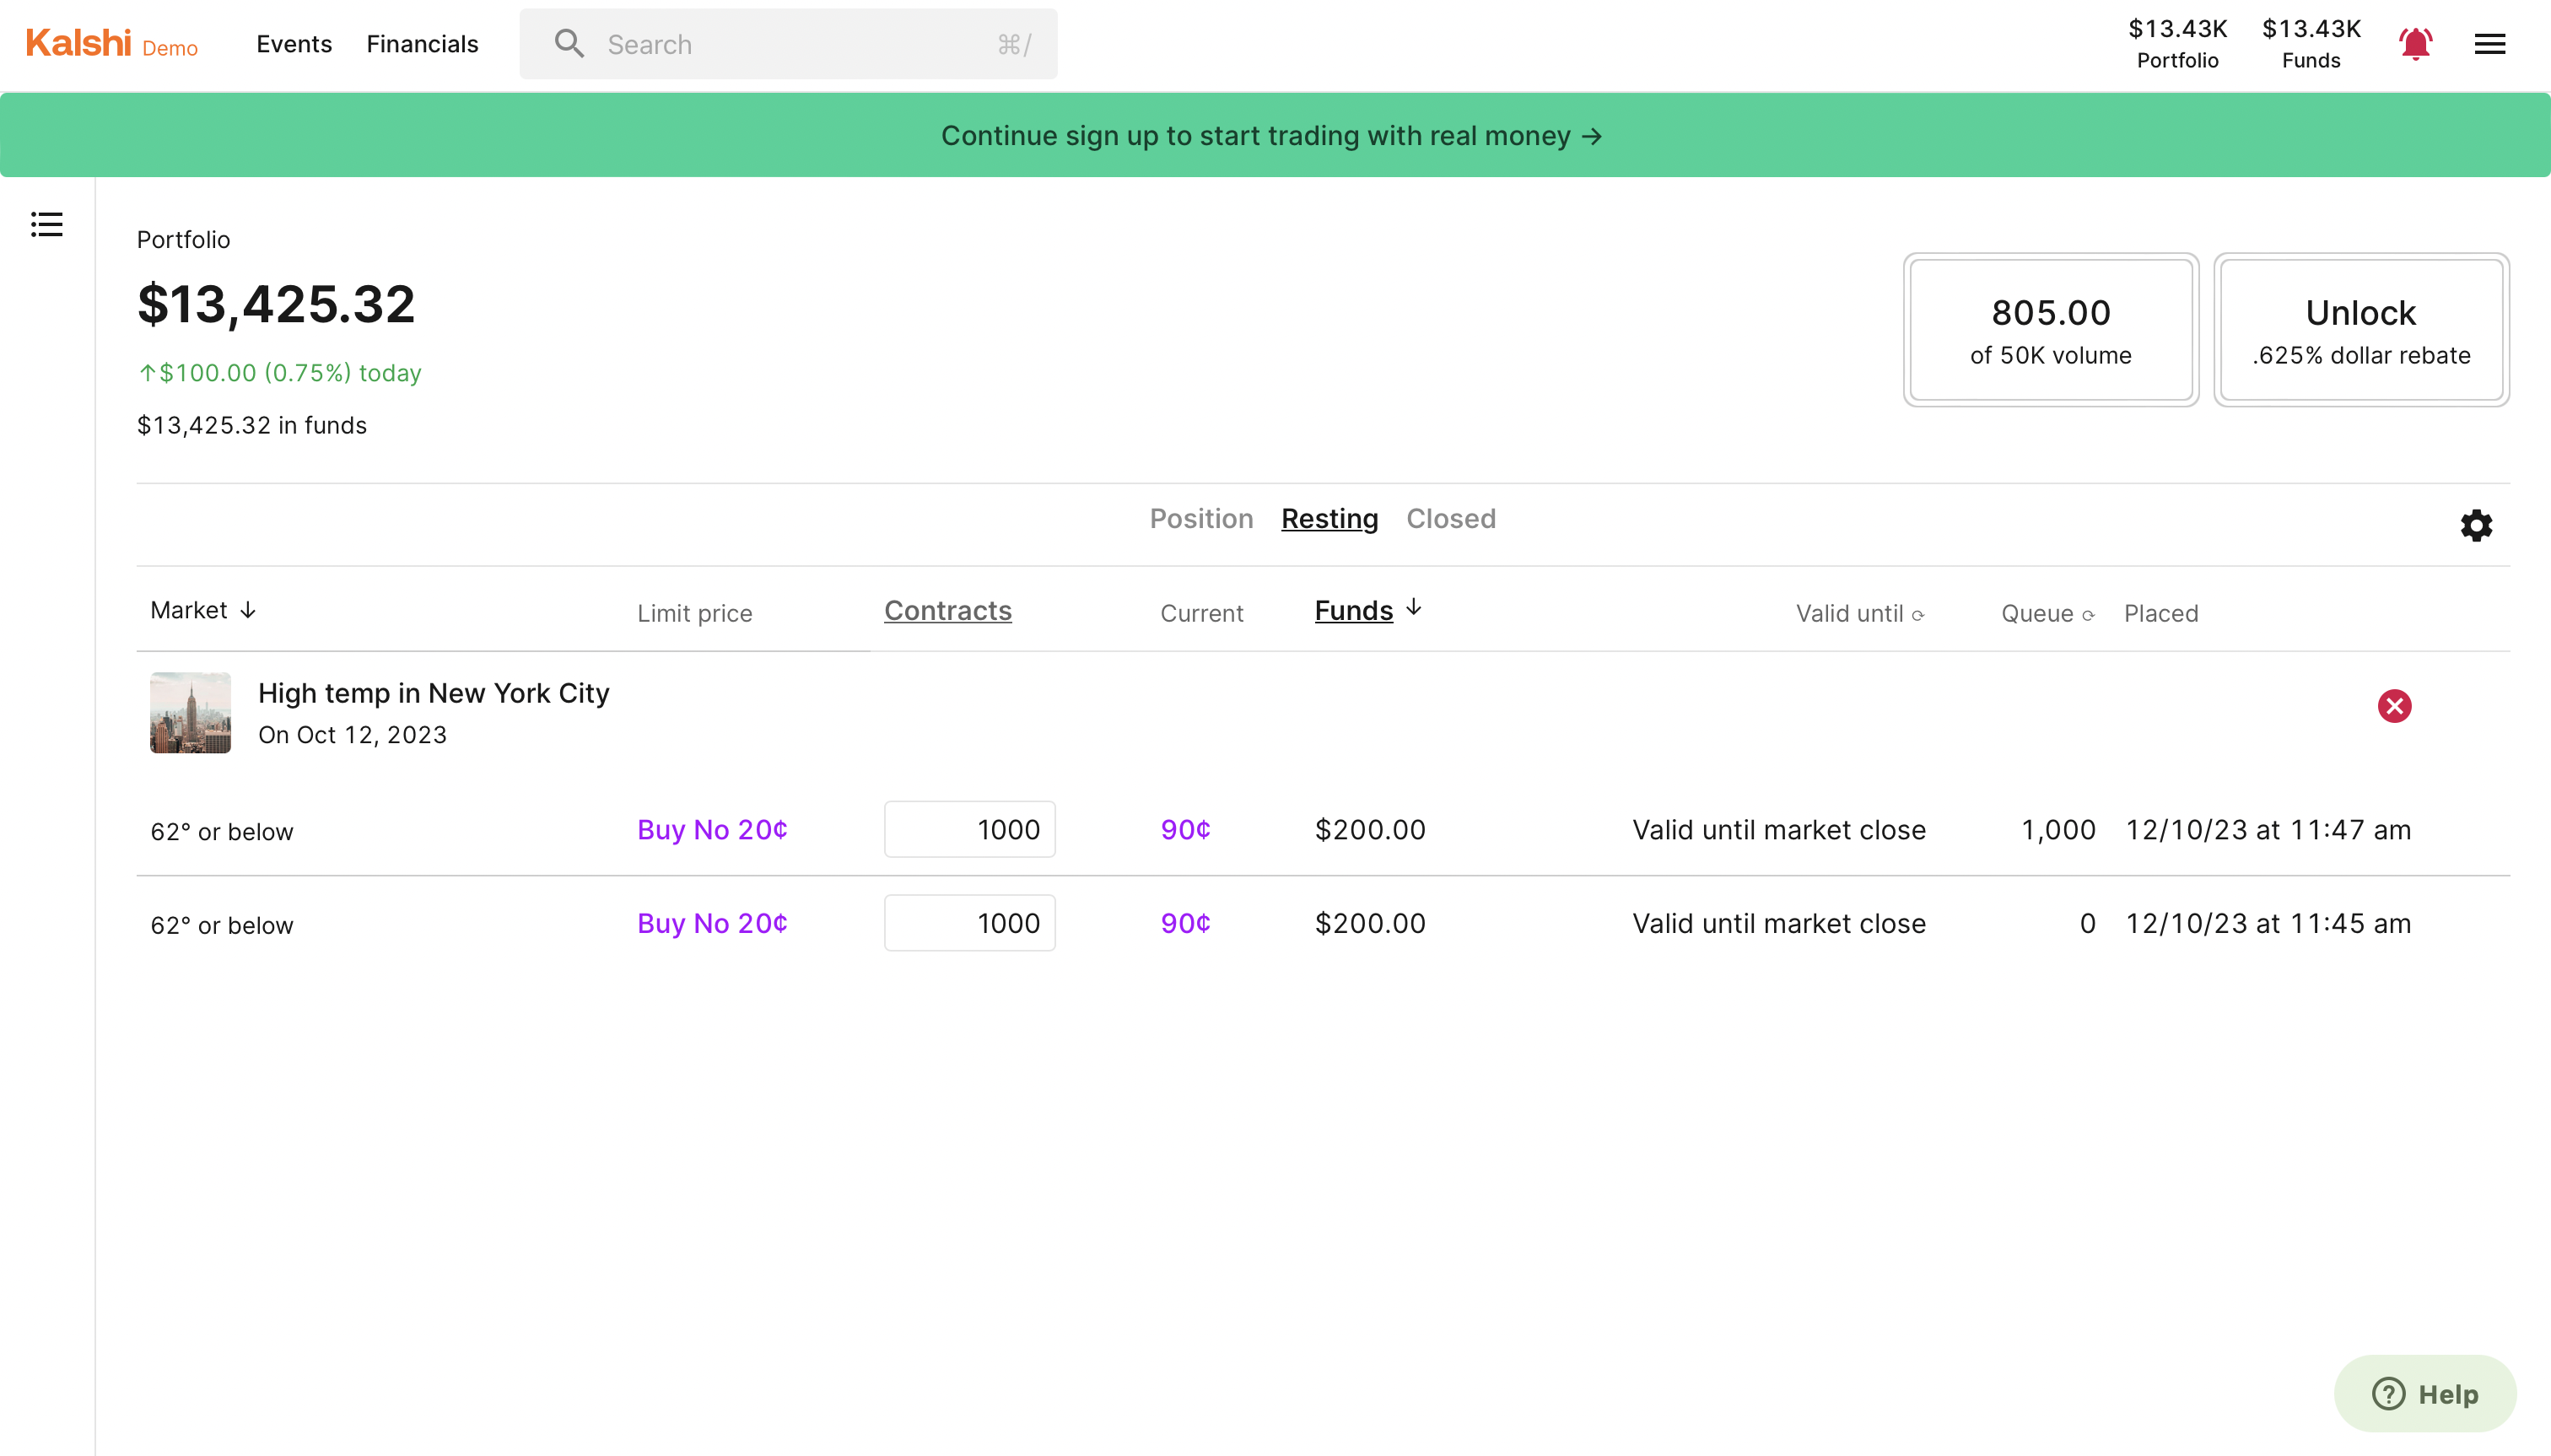

# Conclusion

In conclusion i think its safe to say that weather prediction models have come a long way since thier inception but there is still a lot of work to be done. 

This project help me understand the complexities behind such predictions and also made the whole activity fun by gamifying the whole task through Kalshi. I feel given more time and effort I could probably make more "money" trading on the demo platform.

In the end, I would like to summarize by saying that I was successful in completes all the requirements of the task such as:
    1.  Identifying all the relevant data sources for weather data of Central park, New York City.
    2.  able to train multiple models like XGBoost, LinearRegression etc. using the said data to predict the high temp for the next day.
    3.  Able to automate trading on Kalshi and make a decent profit using a smart trading philosophy.